## Plotting the angle difference feature

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import argparse
import time
import pylab as pl
from IPython import display
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
# deviation angle

# The optical flow of each frame is represented in a 2d array of shape(n,2) where n is the number of pixels being tracked
# opt_flw s used for the current's frame optical flow
# opt_flw_old s used for the previous' frame optical flow


def angle_difference_feature(opt_flw,opt_flw_old):
    rms=np.sqrt(np.sum(opt_flw**2,axis=1))
    angle_difference = np.sum(np.multiply(opt_flw,opt_flw_old),axis=1)/(rms * np.sqrt(np.sum(opt_flw_old**2,axis=1)))
    return rms * angle_difference

In [4]:
#This code calculates the optical flow for video frames and the difference angle between the optical flows
#   - the video frames will be passed through a mask filter first


path_to_video = 'test.mp4'
cap = cv.VideoCapture(path_to_video)

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

# create a list to store the differnce angles of each frame
angle_diff_vid=[]

# create a list to store the pixels corresponding to each difference angle
angle_diff_pix_vid=[]

# variable used to skip calculating the difference angle for the first frame 
frame_num = 0






while(frame_num<30):
    ret,frame = cap.read()
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]

    
    ### Calculate the optical flow
    opt_flw= good_new - good_old
    st = st.flatten()
    
    
    ### Calculate the difference angle
    if frame_num!=0 :
        opt_flw_old = opt_flw_old[st==1]
        angle_diff_frame = angle_difference_feature(opt_flw,opt_flw_old)
        angle_diff_frame[::-1].sort()
        angle_diff_frame = angle_diff_frame[0:101]
        angle_diff_pix_vid.append(good_old)
        angle_diff_vid.append(angle_diff_frame)
        
        

  
    
    
        
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    
    ### update the previous optical flow
    opt_flw_old= opt_flw
    
    ### skip first frame difference angle
    #if frame_num == 0:
    frame_num= frame_num + 1
    
    
    

### Plotting 

### Feature distribution for the first 30 frames

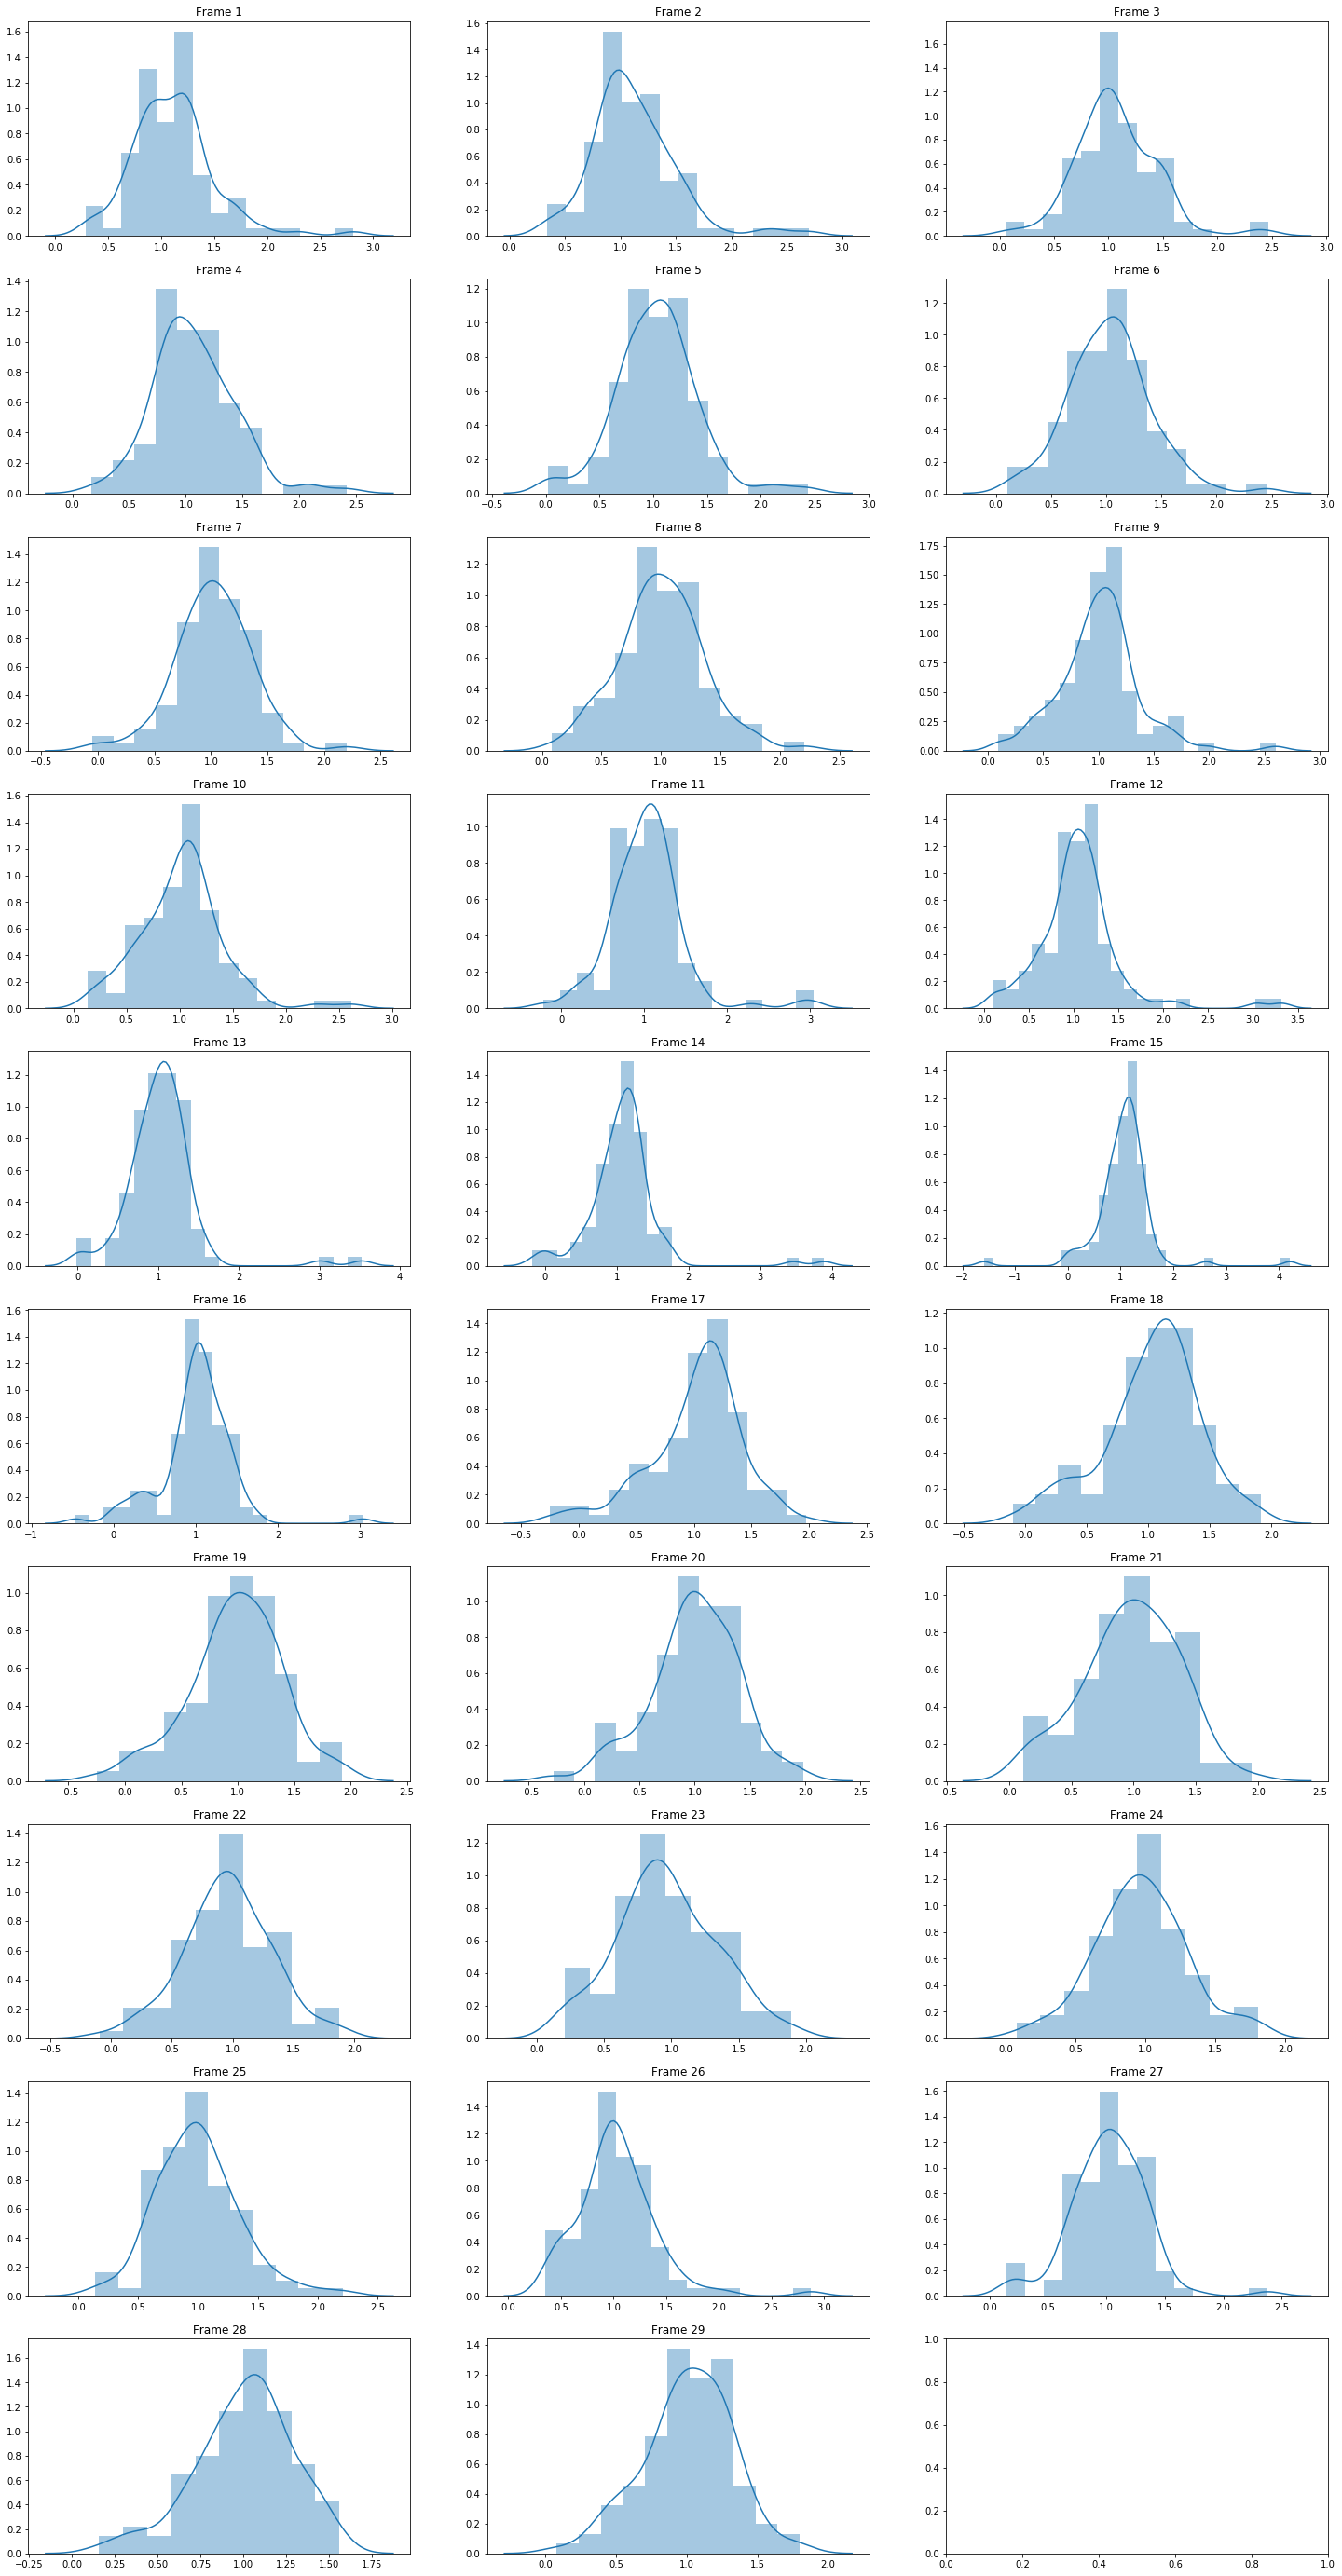

In [9]:
fig, axs = plt.subplots(10, 3,figsize=(25,50))
i=0
j=0
cpt=0
for z in angle_diff_vid :
    sns.distplot(a=z, kde=True,ax=axs[i,j])
    s= 'Frame ' + str(cpt+1)
    cpt=cpt+1
    axs[i,j].set_title(s)
    j=j+1
    if j== 3 :
        j=0
        i=i+1
    

### Using heatmaps to visualize points' positions

#### Frame 3

Text(204.0, 0.5, 'Y')

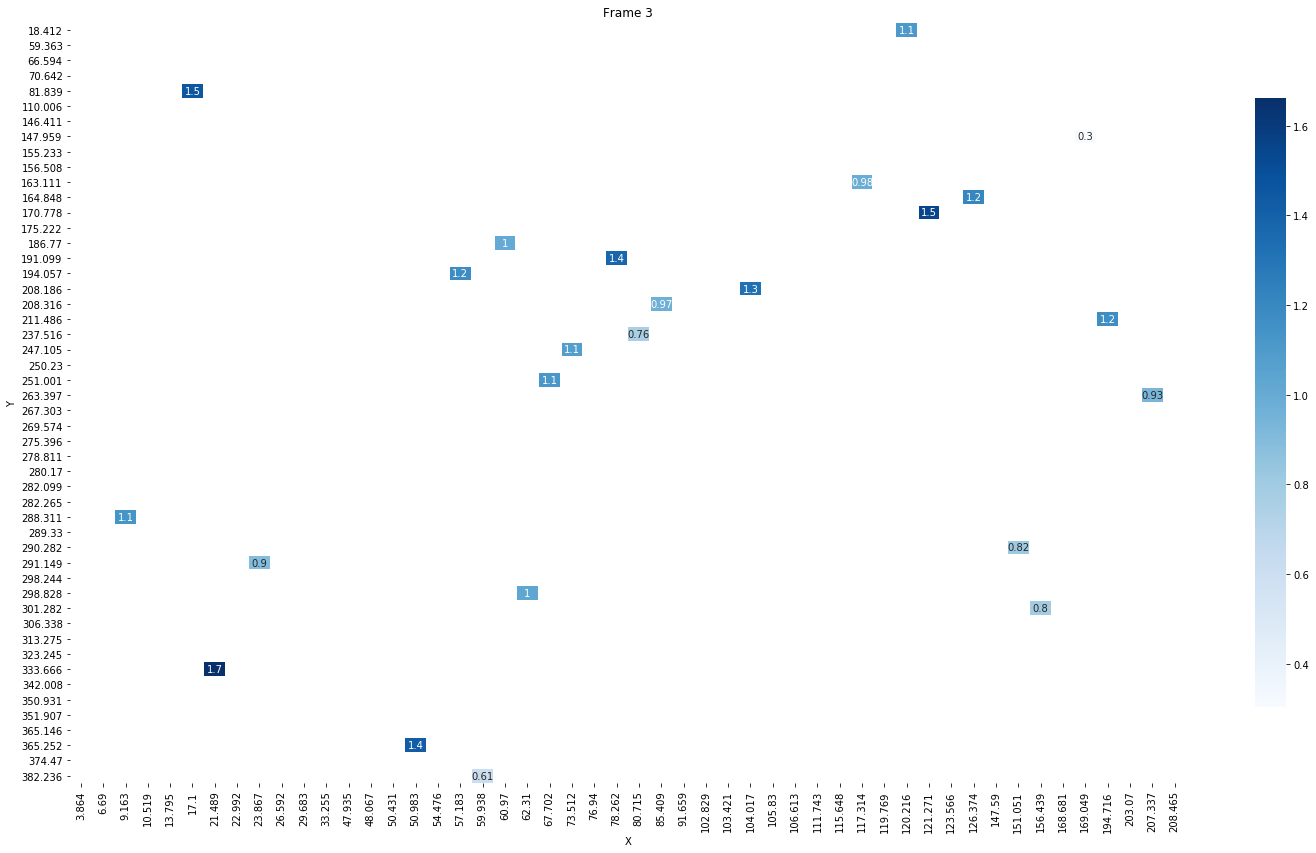

In [8]:
z=angle_diff_vid[3]
z=z.tolist()
x=angle_diff_pix_vid[3][:,0]
x=x.tolist()
y=angle_diff_pix_vid[3][:,1]
y=y.tolist()
# assign data of lists.  
data = {'X': x, 'Y': y, 'Z' : z}  
  
# Create DataFrame  
df=pd.DataFrame(data)  
df=df.round(3)
data = df.pivot("X", "Y", "Z")
data.fillna(0)

plt.figure(figsize=(25,14))

# Add title
plt.title("Frame 3")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=data.iloc[:50,:50], annot=True,cmap="Blues", 
           linewidth=0.6, cbar_kws={"shrink": .8})

# Add label for horizontal axis
plt.xlabel("X")
plt.ylabel("Y")


#### Frame 12

Text(204.0, 0.5, 'Y')

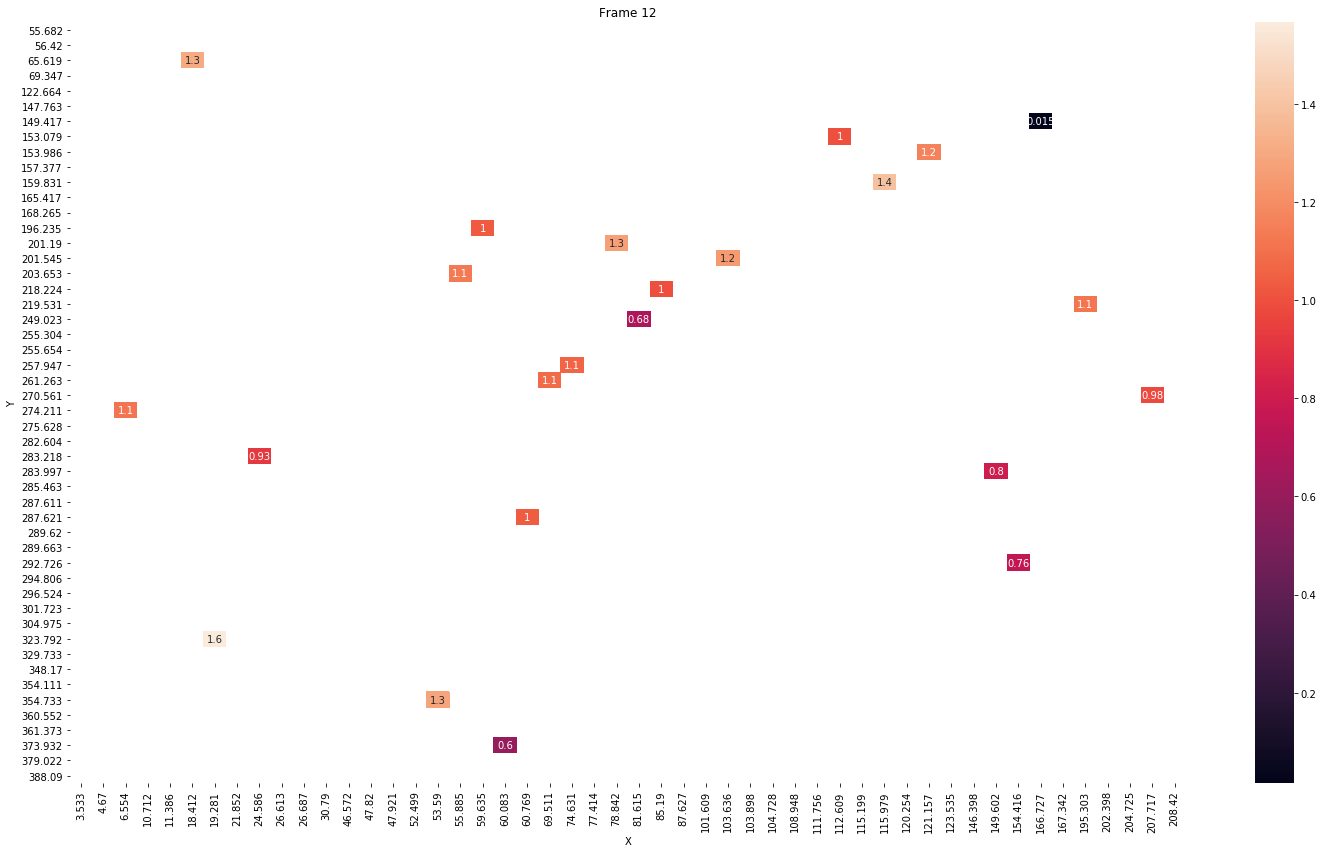

In [30]:
z=angle_diff_vid[12]
z=z.tolist()
x=angle_diff_pix_vid[12][:,0]
x=x.tolist()
y=angle_diff_pix_vid[12][:,1]
y=y.tolist()
# assign data of lists.  
data = {'X': x, 'Y': y, 'Z' : z}  
  
# Create DataFrame  
df=pd.DataFrame(data)  
df=df.round(3)
data = df.pivot("X", "Y", "Z")
data.fillna(0)

plt.figure(figsize=(25,14))

# Add title
plt.title("Frame 12")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=data.iloc[:50,:50], annot=True)

# Add label for horizontal axis

plt.xlabel("X")
plt.ylabel("Y")



#### Frame 27

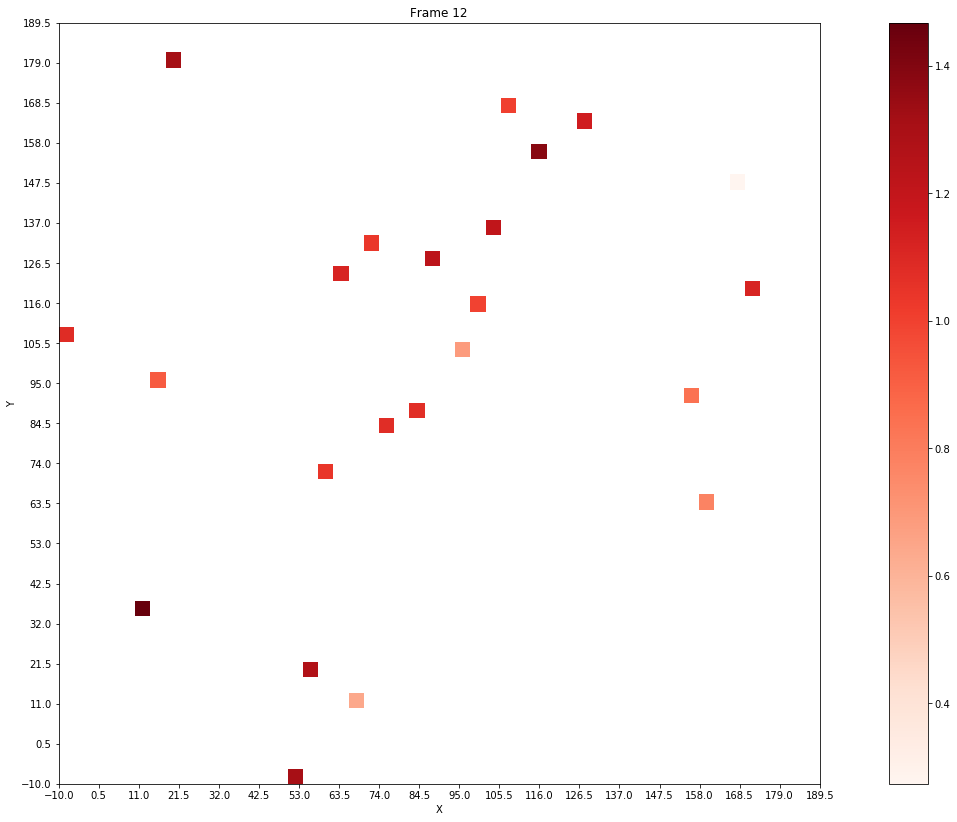

In [34]:
z=angle_diff_vid[27]
z=z.tolist()
x=angle_diff_pix_vid[27][:,0]
x=x.tolist()
y=angle_diff_pix_vid[27][:,1]
y=y.tolist()
# assign data of lists.  
data = {'X': x, 'Y': y, 'Z' : z}  
  
# Create DataFrame  
df=pd.DataFrame(data)  
df=df.round(3)
data = df.pivot("X", "Y", "Z")
data.fillna(0)

plt.figure(figsize=(25,14))

# Add title
plt.title("Frame 12")


# Add label for horizontal axis

plt.xlabel("X")
plt.ylabel("Y")

binsx = np.arange(-10,200,10.5)
binsy = np.arange(-10,200,10.5)


plt.imshow(data.iloc[:50,:50], cmap=plt.cm.Reds, 
           extent=[binsx.min(), binsx.max(),binsy.min(),binsy.max()])
plt.xticks(binsx)
plt.yticks(binsy)
plt.colorbar()
plt.grid(False)